# 要点とまとめと考察

section1:強化学習
強化学習は行動の結果として与えられる利益(報酬)をもとに、行動を決定する原理を改善していく。
Q学習と関数近似法を組み合わせる手法を使用する。Q学習は行動価値関数を行動する毎に更新することにより学習を進める方法。
関数近似法は価値関数や方策関数を関数近似する手法。

section２:alpha go
alpha goには、alphago(lee)とalphago(zero)がある。

alphago(lee)は、RollOutPolicy（＝出力はそのマスの着手予想確率）、PolicyNet（＝出力は19×19マスの着手予想確率）,ValueNet（＝出力は現局面の勝率）の学習をする。
教師あり学習によるRollOutPolicyとPolicyNetの学習、強化学習によるPolicyNetの学習、強化学習によるValueNetの学習を行う。
強化学習の手法としてモンテカルロ木探索を使用する。
AlphaGoZeroの特徴は、強化学習のみで作成、特徴入力からヒューリスティックな要素を排除、PolicyNetとValueNetを１つのネットワークに統合、Residual Netの導入、RollOut方策を使用しない。

section3:軽量化高速化技術
軽量化高速化技術として、データ並列化、モデル並列化、GPUの使用、モデルの軽量化（量子化・蒸留・プルーニング）がある。
データ並列化は同期型と非同期型があり、同期型が現在の主流となる。
GPGPUの開発環境としてCUDAやopenclがある。
量子化は通常のパラメータの64 bit 浮動小数点を32 bit など下位の精度に落とす。
蒸留は、学習済みの精度の高いモデルの知識を軽量なモデルへ継承させる。教師モデルの重みを固定し生徒モデルの重みを更新していく。
プルーニングは重みが閾値以下のニューロンを削減する。

section４:応用モデル
MobileNetsはDepthwiseConvolutionとPointwise Convolutionの組み合わせで軽量化を実現した。
Depthwise Convolutionはチャンネル数とフィルタ数が１であり、Pointwise Convolutionはフィルタサイズが１＊１である。
DenseNetは前方の各層からの出力全てが後方の層への入力として用いられる。
成⻑率(Growth Rate)と呼ばれるハイパーパラメータが存在し、各ブロック毎にk個ずつ特徴マップのチャネル数が増加していく。
Transition Layerと呼ばれる層でダウンサンプリングをしてDence block同士をつなぐ。
Batch Norm Layerはレイヤー間を流れるデータの分布を、ミニバッチ単位で平均が0・分散が1になるように正規化する。
Layer NormはH x W x Cの全てのpixelを正規化する。
Instance Normは各sampleの各チャンネルごとに正規化する。
WaveNetは時系列データに対して畳み込み（Dilated convolution）を使う。（層が深くなるにつれて畳み込みリンクを離し、パラメータ数に対する受容野が広い。）

section５:Transformer
Transformerはrnnを使わずにattentionだけで構成されている。
attentionは辞書型オブジェクトであり、query(検索クエリ)に一致するkeyを索引し、対応するvalueを取り出す操作とみなすことができる。
注意機構には自己注意機構とソースターゲット機構の２種類があり、自己注意機構が重要である。

section6:物体検知・セグメンテーション
物体検出の評価指標としてIoU（Intersection over Union）があり、2つの領域が「どれくらい重なっているか」を表す指標である。
２段階検出器（fastRcnn）と１段階検出器（SSD、YOLO）があり、２段階検出器の方が精度が高く速度が遅い。
SSDはVGG16の特徴量抽出の１部を使用している。
Semantic Segmentationでは、convolutionおよびpoolingしたあとにupsamplingしている。
エンコーダー、デコーダモデルのUnetでは、エンコーダーからデコーダーへのスキップ層があり、DilatedConvolutionで受容野を広げる工夫がされている。

## 実装演習

In [ ]:
import tensorflow as tf
import numpy as np
#tensorflowv2対応でコード修正

# それぞれ定数を定義
a = tf.constant(1)
b = tf.constant(2, dtype=tf.float32, shape=[3,2])
c = tf.constant(np.arange(4), dtype=tf.float32, shape=[2,2])

print('a:', a)
print('b:', b)
print('c:', c)


#sess = tf.Session()

#print('a:', sess.run(a))
#print('b:', sess.run(b))
#print('c:', sess.run(c))

# 定数を定義
a = tf.constant(10)
print('a:', a)
# 変数を定義
x = tf.Variable(1)
print('x:', x)

def calc_op(x):
  return x*a

# 変数の初期化
print(x)
x=calc_op(x)
print(x)
x=calc_op(x)
print(x)

a: Tensor("Const_1393:0", shape=(), dtype=int32)
b: Tensor("Const_1394:0", shape=(3, 2), dtype=float32)
c: Tensor("Const_1395:0", shape=(2, 2), dtype=float32)
a: Tensor("Const_1396:0", shape=(), dtype=int32)
x: <tf.Variable 'Variable_20:0' shape=() dtype=int32>
<tf.Variable 'Variable_20:0' shape=() dtype=int32>
Tensor("mul:0", shape=(), dtype=int32)
Tensor("mul_1:0", shape=(), dtype=int32)


2.7.0
True
Generation: 1. 誤差 = tf.Tensor(11.71926, shape=(), dtype=float32)
Generation: 2. 誤差 = tf.Tensor(11.166562, shape=(), dtype=float32)
Generation: 3. 誤差 = tf.Tensor(10.640538, shape=(), dtype=float32)
Generation: 4. 誤差 = tf.Tensor(10.1399, shape=(), dtype=float32)
Generation: 5. 誤差 = tf.Tensor(9.663423, shape=(), dtype=float32)
Generation: 6. 誤差 = tf.Tensor(9.209938, shape=(), dtype=float32)
Generation: 7. 誤差 = tf.Tensor(8.778335, shape=(), dtype=float32)
Generation: 8. 誤差 = tf.Tensor(8.367558, shape=(), dtype=float32)
Generation: 9. 誤差 = tf.Tensor(7.9766016, shape=(), dtype=float32)
Generation: 10. 誤差 = tf.Tensor(7.6045055, shape=(), dtype=float32)
Generation: 11. 誤差 = tf.Tensor(7.250362, shape=(), dtype=float32)
Generation: 12. 誤差 = tf.Tensor(6.913302, shape=(), dtype=float32)
Generation: 13. 誤差 = tf.Tensor(6.592501, shape=(), dtype=float32)
Generation: 14. 誤差 = tf.Tensor(6.2871733, shape=(), dtype=float32)
Generation: 15. 誤差 = tf.Tensor(5.9965725, shape=(), dtype=float32)
Gen

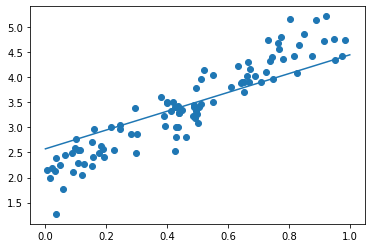

In [ ]:
import numpy as np
import tensorflow as tf
#import tensorflow.compat.v1 as tf 
#tf.disable_v2_behavior()
import matplotlib.pyplot as plt

print(tf.__version__)
print(tf.executing_eagerly())
iters_num = 300
plot_interval = 10

# データを生成
n = 100
x = np.random.rand(n)
d = 3 * x + 2


# ノイズを加える
noise = 0.3
d = d + noise * np.random.randn(n) 
x=x.astype(np.float32)
d=d.astype(np.float32)
# 入力値
#xt = tf.placeholder(tf.float32, shape=[None,1])
#dt = tf.placeholder(tf.float32, shape=[None,1])

# 最適化の対象の変数を初期化
class Model(tf.keras.Model):
  def __init__(self):
    super(Model, self).__init__()

    self.W = tf.Variable(0.0)
    self.b = tf.Variable(0.0)
    self.params = [self.W, self.b]

  def call(self, x):
    return self.W*x + self.b

model = Model()
loss_object = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

# 誤差関数 平均2乗誤差
@tf.function
def train_step(x, y):
  with tf.GradientTape() as tape:
    predictions = model(x)
    loss = loss_object(y, predictions)
  
  gradients = tape.gradient(loss, model.params)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

# 作成したデータをトレーニングデータとして準備
x_train = x.reshape(-1,1)
d_train = d.reshape(-1,1)

# トレーニング
for i in range(iters_num):
    train_step(x=x_train,y=d_train)
    loss_val = loss_object(d_train, model(x_train))
    print('Generation: ' + str(i+1) + '. 誤差 = ' + str(loss_val))

fig = plt.figure()
subplot = fig.add_subplot(1, 1, 1)
plt.scatter(x, d)
linex = np.linspace(0, 1, 2)
liney = model.predict(linex)
subplot.plot(linex,liney)
plt.show()

ストリーミング出力は最後の 5000 行に切り捨てられました。
Generation: 5001. 誤差 = tf.Tensor(0.16096702, shape=(), dtype=float32)
Generation: 5002. 誤差 = tf.Tensor(0.1608403, shape=(), dtype=float32)
Generation: 5003. 誤差 = tf.Tensor(0.1607136, shape=(), dtype=float32)
Generation: 5004. 誤差 = tf.Tensor(0.16058692, shape=(), dtype=float32)
Generation: 5005. 誤差 = tf.Tensor(0.16046035, shape=(), dtype=float32)
Generation: 5006. 誤差 = tf.Tensor(0.16033378, shape=(), dtype=float32)
Generation: 5007. 誤差 = tf.Tensor(0.16020727, shape=(), dtype=float32)
Generation: 5008. 誤差 = tf.Tensor(0.16008082, shape=(), dtype=float32)
Generation: 5009. 誤差 = tf.Tensor(0.15995431, shape=(), dtype=float32)
Generation: 5010. 誤差 = tf.Tensor(0.15982795, shape=(), dtype=float32)
Generation: 5011. 誤差 = tf.Tensor(0.15970162, shape=(), dtype=float32)
Generation: 5012. 誤差 = tf.Tensor(0.15957534, shape=(), dtype=float32)
Generation: 5013. 誤差 = tf.Tensor(0.15944909, shape=(), dtype=float32)
Generation: 5014. 誤差 = tf.Tensor(0.15932293, shape=(), dtype

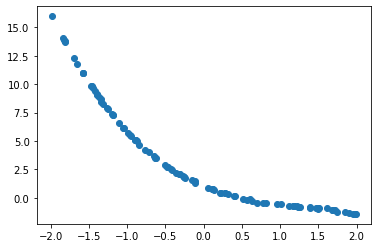

In [ ]:
import numpy as np
import tensorflow as tf
#import tensorflow.compat.v1 as tf 
#tf.disable_v2_behavior()
import matplotlib.pyplot as plt

iters_num = 10000
plot_interval = 100

# データを生成
n=100
x = np.random.rand(n).astype(np.float32) * 4 - 2
d =  - 0.4 * x ** 3 + 1.6 * x ** 2 - 2.8 * x + 1
d=d.astype(np.float32)
#  ノイズを加える
noise = 0.05
d = d + noise * np.random.randn(n) 

# モデル
# bを使っていないことに注意.
class Model(tf.keras.Model):
  def __init__(self):
    super(Model, self).__init__()
    self.W = tf.Variable(tf.random.normal([4, 1], stddev=0.01))
    self.params = [self.W]
  def call(self, x):
    return tf.matmul(x,self.W)

model = Model()

#xt = tf.placeholder(tf.float32, [None, 4])
#dt = tf.placeholder(tf.float32, [None, 1])
#W = tf.Variable(tf.random_normal([4, 1], stddev=0.01))
#y = tf.matmul(xt,W)

# 誤差関数 平均２乗誤差

loss_object = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# 誤差関数 平均2乗誤差
@tf.function
def train_step2(x, y):
  with tf.GradientTape() as tape:
    predictions = model(x)
    loss = loss_object(y, predictions)
  
  gradients = tape.gradient(loss, model.params)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

#loss = tf.reduce_mean(tf.square(y - dt))
#optimizer = tf.train.AdamOptimizer(0.001)
#train = optimizer.minimize(loss)

# 初期化
#init = tf.global_variables_initializer()
#sess = tf.Session()
#sess.run(init)

# 作成したデータをトレーニングデータとして準備
d_train = d.reshape(-1,1)
x_train = np.zeros([n, 4])
for i in range(n):
    for j in range(4):
        x_train[i, j] = x[i]**j

x_train=x_train.astype(np.float32)
#  トレーニング
for i in range(iters_num):
    train_step2(x=x_train,y=d_train)
    loss_val = loss_object(d_train, model(x_train))
    #loss_val = sess.run(loss, feed_dict={xt:x_train, dt:d_train}) 
    print('Generation: ' + str(i+1) + '. 誤差 = ' + str(loss_val))
    
fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
plt.scatter(x ,d)
#linex = np.linspace(-2,2,100)
#liney = model.predict(linex)
#subplot.plot(linex,liney)
plt.show()

In [ ]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf 
tf.disable_v2_behavior()
import matplotlib.pyplot as plt

# logging levelを変更
tf.logging.set_verbosity(tf.logging.ERROR)

mnist = tf.keras.datasets.mnist

iters_num = 100
batch_size = 100
plot_interval = 1

x = tf.placeholder(tf.float32, [None, 784])
d = tf.placeholder(tf.float32, [None, 10])
W = tf.Variable(tf.random_normal([784, 10], stddev=0.01))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x, W) + b)

# 交差エントロピー
cross_entropy = -tf.reduce_sum(d * tf.log(y), reduction_indices=[1])
loss = tf.reduce_mean(cross_entropy)
train = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

# 正誤を保存
correct = tf.equal(tf.argmax(y, 1), tf.argmax(d, 1))
# 正解率
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

accuracies = []
for i in range(iters_num):
    x_batch, d_batch = mnist.train.next_batch(batch_size)
    sess.run(train, feed_dict={x: x_batch, d: d_batch})
    if (i+1) % plot_interval == 0:
        print(sess.run(correct, feed_dict={x: mnist.test.images, d: mnist.test.labels}))
        accuracy_val = sess.run(accuracy, feed_dict={x: mnist.test.images, d: mnist.test.labels})
        accuracies.append(accuracy_val)
        print('Generation: ' + str(i+1) + '. 正解率 = ' + str(accuracy_val))
        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies)
plt.title("accuracy")
plt.ylim(0, 1.0)
plt.show()        

In [ ]:
import tensorflow as tf
import numpy as np

# logging levelを変更
tf.logging.set_verbosity(tf.logging.ERROR)

from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

iters_num = 3000
batch_size = 100
plot_interval = 100

hidden_layer_size_1 = 600
hidden_layer_size_2 = 300

dropout_rate = 0.5

x = tf.placeholder(tf.float32, [None, 784])
d = tf.placeholder(tf.float32, [None, 10])
W1 = tf.Variable(tf.random_normal([784, hidden_layer_size_1], stddev=0.01))
W2 = tf.Variable(tf.random_normal([hidden_layer_size_1, hidden_layer_size_2], stddev=0.01))
W3 = tf.Variable(tf.random_normal([hidden_layer_size_2, 10], stddev=0.01))

b1 = tf.Variable(tf.zeros([hidden_layer_size_1]))
b2 = tf.Variable(tf.zeros([hidden_layer_size_2]))
b3 = tf.Variable(tf.zeros([10]))

z1 = tf.sigmoid(tf.matmul(x, W1) + b1)
z2 = tf.sigmoid(tf.matmul(z1, W2) + b2)

keep_prob = tf.placeholder(tf.float32)
drop = tf.nn.dropout(z2, keep_prob)

y = tf.nn.softmax(tf.matmul(drop, W3) + b3)
loss = tf.reduce_mean(-tf.reduce_sum(d * tf.log(y), reduction_indices=[1]))


# optimizer = tf.train.GradientDescentOptimizer(0.5)
# optimizer = tf.train.MomentumOptimizer(0.1, 0.9)
# optimizer = tf.train.AdagradOptimizer(0.1)
# optimizer = tf.train.RMSPropOptimizer(0.001)
optimizer = tf.train.AdamOptimizer(1e-4)

train = optimizer.minimize(loss)
correct = tf.equal(tf.argmax(y, 1), tf.argmax(d, 1))
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

accuracies = []
for i in range(iters_num):
    x_batch, d_batch = mnist.train.next_batch(batch_size)
    sess.run(train, feed_dict={x:x_batch, d:d_batch, keep_prob:(1 - dropout_rate)})
    if (i+1) % plot_interval == 0:
        accuracy_val = sess.run(accuracy, feed_dict={x:mnist.test.images, d:mnist.test.labels, keep_prob:1.0})            
        accuracies.append(accuracy_val)
        print('Generation: ' + str(i+1) + '. 正解率 = ' + str(accuracy_val))        


lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies)
plt.title("accuracy")
plt.ylim(0, 1.0)
plt.show()            

In [ ]:
import tensorflow as tf
#from tensorflow.examples.tutorials.mnist import input_data
from tensorflow.keras import datasets, layers, models
# logging levelを変更
#tf.logging.set_verbosity(tf.logging.ERROR)

#mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

import matplotlib.pyplot as plt

iters_num = 300
batch_size = 100
plot_interval = 10

dropout_rate = 0.5


#model
model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(dropout_rate))
model.add(layers.Dense(10, activation='softmax'))
model.summary()


#画像
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# 画像を784の一次元から28x28の二次元に変換する
# 画像を28x28にreshape
train_images = tf.reshape(train_images, [-1,28,28,1])



# 交差エントロピー
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images, test_labels)               

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 4, 4, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 2, 2, 64)          36928     
                                                                 
 flatten_5 (Flatten)         (None, 256)              

In [ ]:
import tensorflow as tf

# logging levelを変更
tf.logging.set_verbosity(tf.logging.ERROR)


import numpy as np
import matplotlib.pyplot as plt

iters_num = 1000
plot_interval = 10

x = np.linspace(-1, 1, 200)
np.random.shuffle(x)
d = 0.5 * x + 2 + np.random.normal(0, 0.05, (200,))

from keras.models import Sequential
from keras.layers import Dense

# モデルを作成
model = Sequential()
model.add(Dense(input_dim=1, units=1))
# model.add(Dense(input_dim=1, output_dim=1))

# モデルを表示
model.summary()

# モデルのコンパイル
model.compile(loss='mse', optimizer='sgd')

# train
for i in range(iters_num):
    loss = model.train_on_batch(x, d)
    if (i+1) % plot_interval == 0:
        print('Generation: ' + str(i+1) + '. 誤差 = ' + str(loss))

W, b = model.layers[0].get_weights()
print('W:', W)
print('b:', b)

y = model.predict(x)
plt.scatter(x, d)
plt.plot(x, y)
plt.show()

In [ ]:
import tensorflow as tf

# logging levelを変更
tf.logging.set_verbosity(tf.logging.ERROR)

# モジュール読み込み
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
 
# 乱数を固定値で初期化
np.random.seed(0)

# シグモイドの単純パーセプトロン作成
model = Sequential()
model.add(Dense(input_dim=2, units=1))
model.add(Activation('sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.1))
 
# トレーニング用入力 X と正解データ T
X = np.array( [[0,0], [0,1], [1,0], [1,1]] )
T = np.array( [[0], [1], [1], [1]] )
 
# トレーニング
model.fit(X, T, epochs=30, batch_size=1)
 
# トレーニングの入力を流用して実際に分類
Y = model.predict_classes(X, batch_size=1)

print("TEST")
print(Y == T)


In [ ]:
import tensorflow as tf

# logging levelを変更
tf.logging.set_verbosity(tf.logging.ERROR)

import matplotlib.pyplot as plt
from sklearn import datasets
iris = datasets.load_iris()
x = iris.data
d = iris.target

# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
x_train, x_test, d_train, d_test = train_test_split(x, d, test_size=0.2)

from keras.models import Sequential
from keras.layers import Dense, Activation
# from keras.optimizers import SGD

#モデルの設定
model = Sequential()
model.add(Dense(12, input_dim=4))
model.add(Activation('relu'))
# model.add(Activation('sigmoid'))
model.add(Dense(3, input_dim=12))
model.add(Activation('softmax'))
model.summary()

model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, d_train, batch_size=5, epochs=20, verbose=1, validation_data=(x_test, d_test))
loss = model.evaluate(x_test, d_test, verbose=0)

#Accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim(0, 1.0)
plt.show()


In [ ]:
import tensorflow as tf

# logging levelを変更
tf.logging.set_verbosity(tf.logging.ERROR)

# 必要なライブラリのインポート
import keras
import matplotlib.pyplot as plt
from data.mnist import load_mnist

(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

# 必要なライブラリのインポート、最適化手法はAdamを使う
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# モデル作成
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.summary()

# バッチサイズ、エポック数
batch_size = 128
epochs = 20

model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False), 
              metrics=['accuracy'])

history = model.fit(x_train, d_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, d_test))
loss = model.evaluate(x_test, d_test, verbose=0)
print('Test loss:', loss[0])
print('Test accuracy:', loss[1])
#Accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.ylim(0, 1.0)
plt.show()

In [ ]:
import tensorflow as tf

# logging levelを変更
tf.logging.set_verbosity(tf.logging.ERROR)

# 必要なライブラリのインポート
import keras
import matplotlib.pyplot as plt
from data.mnist import load_mnist

(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)


# 行列として入力するための加工
batch_size = 128
num_classes = 10
epochs = 20

img_rows, img_cols = 28, 28

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)


# 必要なライブラリのインポート、最適化手法はAdamを使う
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

# バッチサイズ、エポック数
batch_size = 128
epochs = 20

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
history = model.fit(x_train, d_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, d_test))

#Accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.ylim(0, 1.0)
plt.show()

In [ ]:
import tensorflow as tf

# logging levelを変更
tf.logging.set_verbosity(tf.logging.ERROR)

#CIFAR-10のデータセットのインポート
from keras.datasets import cifar10
(x_train, d_train), (x_test, d_test) = cifar10.load_data()

#CIFAR-10の正規化
from keras.utils import to_categorical
  
# 特徴量の正規化
x_train = x_train/255.
x_test = x_test/255.
 
# クラスラベルの1-hotベクトル化
d_train = to_categorical(d_train, 10)
d_test = to_categorical(d_test, 10)
 
# CNNの構築
import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Dropout, Activation, Flatten
import numpy as np
 
model = Sequential()
 
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))
 
# コンパイル
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
 
#訓練
history = model.fit(x_train, d_train, epochs=20)
 
# モデルの保存
model.save('./CIFAR-10.h5')
 
#評価 & 評価結果出力
print(model.evaluate(x_test, d_test))

In [ ]:
import tensorflow as tf

# logging levelを変更
#tf.logging.set_verbosity(tf.logging.ERROR)

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout,Activation
from keras.layers.wrappers import TimeDistributed
#from tf.keras import optimizers
from keras.layers.recurrent import SimpleRNN, LSTM, GRU


# データを用意
# 2進数の桁数
binary_dim = 8
# 最大値 + 1
largest_number = pow(2, binary_dim)

# largest_numberまで2進数を用意
binary = np.unpackbits(np.array([range(largest_number)], dtype=np.uint8).T,axis=1)[:, ::-1]


# A, B初期化 (a + b = d)
a_int = np.random.randint(largest_number/2, size=20000)
a_bin = binary[a_int] # binary encoding
b_int = np.random.randint(largest_number/2, size=20000)
b_bin = binary[b_int] # binary encoding

x_int = []
x_bin = []
for i in range(10000):
    x_int.append(np.array([a_int[i], b_int[i]]).T)
    x_bin.append(np.array([a_bin[i], b_bin[i]]).T)

x_int_test = []
x_bin_test = []
for i in range(10001, 20000):
    x_int_test.append(np.array([a_int[i], b_int[i]]).T)
    x_bin_test.append(np.array([a_bin[i], b_bin[i]]).T)

x_int = np.array(x_int)
x_bin = np.array(x_bin)
x_int_test = np.array(x_int_test)
x_bin_test = np.array(x_bin_test)


# 正解データ
d_int = a_int + b_int
d_bin = binary[d_int][0:10000]
d_bin_test = binary[d_int][10001:20000]

model = Sequential()

model.add(SimpleRNN(units=16,
               return_sequences=True,
               input_shape=[8, 2],
               go_backwards=False,
               activation='relu',
               # dropout=0.5,
               # recurrent_dropout=0.3,
               # unroll = True,
            ))
# 出力層
model.add(Dense(1, activation='sigmoid', input_shape=(-1,2)))
model.summary()
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.SGD(lr=0.1), metrics=['accuracy'])
# model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_bin, d_bin.reshape(-1, 8, 1), epochs=5, batch_size=2)

# テスト結果出力
score = model.evaluate(x_bin_test, d_bin_test.reshape(-1,8,1), verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 8, 16)             304       
                                                                 
 dense_11 (Dense)            (None, 8, 1)              17        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


5000/5000 [==============================] - 43s 8ms/step - loss: 0.1107 - accuracy: 0.8549
Epoch 2/5
5000/5000 [==============================] - 41s 8ms/step - loss: 0.0043 - accuracy: 0.9998
Epoch 3/5
5000/5000 [==============================] - 40s 8ms/step - loss: 9.8255e-04 - accuracy: 1.0000
Epoch 4/5
5000/5000 [==============================] - 41s 8ms/step - loss: 5.2950e-04 - accuracy: 1.0000
Epoch 5/5
5000/5000 [==============================] - 41s 8ms/step - loss: 3.5415e-04 - accuracy: 1.0000
Test loss: 0.00030042207799851894
Test accuracy: 1.0


In [ ]:
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.0-{platform}-linux_x86_64.whl torchvision
import torch
print(torch.__version__)
print(torch.cuda.is_available())

! wget https://www.dropbox.com/s/9narw5x4uizmehh/utils.py
! mkdir images data

# data取得
! wget https://www.dropbox.com/s/o4kyc52a8we25wy/dev.en -P data/
! wget https://www.dropbox.com/s/kdgskm5hzg6znuc/dev.ja -P data/
! wget https://www.dropbox.com/s/gyyx4gohv9v65uh/test.en -P data/
! wget https://www.dropbox.com/s/hotxwbgoe2n013k/test.ja -P data/
! wget https://www.dropbox.com/s/5lsftkmb20ay9e1/train.en -P data/
! wget https://www.dropbox.com/s/ak53qirssci6f1j/train.ja -P data/

import random
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from nltk import bleu_score

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.nn.utils.rnn import pad_packed_sequence, pack_padded_sequence
from utils import Vocab

# デバイスの設定
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

torch.manual_seed(1)
random_state = 42

print(torch.__version__)
def load_data(file_path):
    # テキストファイルからデータを読み込むメソッド
    data = []
    for line in open(file_path, encoding='utf-8'):
        words = line.strip().split()  # スペースで単語を分割
        data.append(words)
    return data
train_X = load_data('./data/train.en')
train_Y = load_data('./data/train.ja')
train_X, valid_X, train_Y, valid_Y = train_test_split(train_X, train_Y, test_size=0.2, random_state=random_state)
# まず特殊トークンを定義しておく
PAD_TOKEN = '<PAD>'  # バッチ処理の際に、短い系列の末尾を埋めるために使う （Padding）
BOS_TOKEN = '<S>'  # 系列の始まりを表す （Beggining of sentence）
EOS_TOKEN = '</S>'  # 系列の終わりを表す （End of sentence）
UNK_TOKEN = '<UNK>'  # 語彙に存在しない単語を表す （Unknown）
PAD = 0
BOS = 1
EOS = 2
UNK = 3

MIN_COUNT = 2  # 語彙に含める単語の最低出現回数 再提出現回数に満たない単語はUNKに置き換えられる

# 単語をIDに変換する辞書の初期値を設定
word2id = {
    PAD_TOKEN: PAD,
    BOS_TOKEN: BOS,
    EOS_TOKEN: EOS,
    UNK_TOKEN: UNK,
    }

# 単語辞書を作成
vocab_X = Vocab(word2id=word2id)
vocab_Y = Vocab(word2id=word2id)
vocab_X.build_vocab(train_X, min_count=MIN_COUNT)
vocab_Y.build_vocab(train_Y, min_count=MIN_COUNT)
def pad_seq(seq, max_length):
    # 系列(seq)が指定の文長(max_length)になるように末尾をパディングする
    res = seq + [PAD for i in range(max_length - len(seq))]
    return res    


class DataLoader(object):

    def __init__(self, X, Y, batch_size, shuffle=False):
        """
        :param X: list, 入力言語の文章（単語IDのリスト）のリスト
        :param Y: list, 出力言語の文章（単語IDのリスト）のリスト
        :param batch_size: int, バッチサイズ
        :param shuffle: bool, サンプルの順番をシャッフルするか否か
        """
        self.data = list(zip(X, Y))
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.start_index = 0
        
        self.reset()
    
    def reset(self):
        if self.shuffle:  # サンプルの順番をシャッフルする
            self.data = shuffle(self.data, random_state=random_state)
        self.start_index = 0  # ポインタの位置を初期化する
    
    def __iter__(self):
        return self

    def __next__(self):
        # ポインタが最後まで到達したら初期化する
        if self.start_index >= len(self.data):
            self.reset()
            raise StopIteration()

        # バッチを取得
        seqs_X, seqs_Y = zip(*self.data[self.start_index:self.start_index+self.batch_size])
        # 入力系列seqs_Xの文章の長さ順（降順）に系列ペアをソートする
        seq_pairs = sorted(zip(seqs_X, seqs_Y), key=lambda p: len(p[0]), reverse=True)
        seqs_X, seqs_Y = zip(*seq_pairs)
        # 短い系列の末尾をパディングする
        lengths_X = [len(s) for s in seqs_X]  # 後述のEncoderのpack_padded_sequenceでも用いる
        lengths_Y = [len(s) for s in seqs_Y]
        max_length_X = max(lengths_X)
        max_length_Y = max(lengths_Y)
        padded_X = [pad_seq(s, max_length_X) for s in seqs_X]
        padded_Y = [pad_seq(s, max_length_Y) for s in seqs_Y]
        # tensorに変換し、転置する
        batch_X = torch.tensor(padded_X, dtype=torch.long, device=device).transpose(0, 1)
        batch_Y = torch.tensor(padded_Y, dtype=torch.long, device=device).transpose(0, 1)

        # ポインタを更新する
        self.start_index += self.batch_size

        return batch_X, batch_Y, lengths_X

# 系列長がそれぞれ4,3,2の3つのサンプルからなるバッチを作成
batch = [[1,2,3,4], [5,6,7], [8,9]]
lengths = [len(sample) for sample in batch]
print('各サンプルの系列長:', lengths)
print()

# 最大系列長に合うように各サンプルをpadding
_max_length = max(lengths)
padded = torch.tensor([pad_seq(sample, _max_length) for sample in batch])
print('paddingされたテンソル:\n', padded)
padded = padded.transpose(0,1) # (max_length, batch_size)に転置
print('padding & 転置されたテンソル:\n', padded)
print('padding & 転置されたテンソルのサイズ:\n', padded.size())
# PackedSequenceに変換（テンソルをRNNに入力する前に適用する）
packed = pack_padded_sequence(padded, lengths=lengths) # 各サンプルの系列長も与える
print('PackedSequenceのインスタンス:\n', packed) # テンソルのPAD以外の値(data)と各時刻で計算が必要な(=PADに到達していない)バッチの数(batch_sizes)を有するインスタンス
print()
# PackedSequenceのインスタンスをRNNに入力する（ここでは省略）
output = packed

# テンソルに戻す(RNNの出力に対して適用する)
output, _length = pad_packed_sequence(output)  # PADを含む元のテンソルと各サンプルの系列長を返す
print('PADを含む元のテンソル:\n', output)
print('各サンプルの系列長:', _length)
class Encoder(nn.Module):
    def __init__(self, input_size, hidden_size):
        """
        :param input_size: int, 入力言語の語彙数
        :param hidden_size: int, 隠れ層のユニット数
        """
        super(Encoder, self).__init__()
        self.hidden_size = hidden_size

        self.embedding = nn.Embedding(input_size, hidden_size, padding_idx=PAD)
        self.gru = nn.GRU(hidden_size, hidden_size)

    def forward(self, seqs, input_lengths, hidden=None):
        """
        :param seqs: tensor, 入力のバッチ, size=(max_length, batch_size)
        :param input_lengths: 入力のバッチの各サンプルの文長
        :param hidden: tensor, 隠れ状態の初期値, Noneの場合は0で初期化される
        :return output: tensor, Encoderの出力, size=(max_length, batch_size, hidden_size)
        :return hidden: tensor, Encoderの隠れ状態, size=(1, batch_size, hidden_size)
        """
        emb = self.embedding(seqs) # seqsはパディング済み
        packed = pack_padded_sequence(emb, input_lengths) # PackedSequenceオブジェクトに変換
        output, hidden = self.gru(packed, hidden)
        output, _ = pad_packed_sequence(output)
        return output, hidden
class Decoder(nn.Module):
    def __init__(self, hidden_size, output_size):
        """
        :param hidden_size: int, 隠れ層のユニット数
        :param output_size: int, 出力言語の語彙数
        :param dropout: float, ドロップアウト率
        """
        super(Decoder, self).__init__()
        self.hidden_size = hidden_size
        self.output_size = output_size

        self.embedding = nn.Embedding(output_size, hidden_size, padding_idx=PAD)
        self.gru = nn.GRU(hidden_size, hidden_size)
        self.out = nn.Linear(hidden_size, output_size)

    def forward(self, seqs, hidden):
        """
        :param seqs: tensor, 入力のバッチ, size=(1, batch_size)
        :param hidden: tensor, 隠れ状態の初期値, Noneの場合は0で初期化される
        :return output: tensor, Decoderの出力, size=(1, batch_size, output_size)
        :return hidden: tensor, Decoderの隠れ状態, size=(1, batch_size, hidden_size)
        """
        emb = self.embedding(seqs)
        output, hidden = self.gru(emb, hidden)
        output = self.out(output)
        return output, hidden
class EncoderDecoder(nn.Module):
    """EncoderとDecoderの処理をまとめる"""
    def __init__(self, input_size, output_size, hidden_size):
        """
        :param input_size: int, 入力言語の語彙数
        :param output_size: int, 出力言語の語彙数
        :param hidden_size: int, 隠れ層のユニット数
        """
        super(EncoderDecoder, self).__init__()
        self.encoder = Encoder(input_size, hidden_size)
        self.decoder = Decoder(hidden_size, output_size)

    def forward(self, batch_X, lengths_X, max_length, batch_Y=None, use_teacher_forcing=False):
        """
        :param batch_X: tensor, 入力系列のバッチ, size=(max_length, batch_size)
        :param lengths_X: list, 入力系列のバッチ内の各サンプルの文長
        :param max_length: int, Decoderの最大文長
        :param batch_Y: tensor, Decoderで用いるターゲット系列
        :param use_teacher_forcing: Decoderでターゲット系列を入力とするフラグ
        :return decoder_outputs: tensor, Decoderの出力, 
            size=(max_length, batch_size, self.decoder.output_size)
        """
        # encoderに系列を入力（複数時刻をまとめて処理）
        _, encoder_hidden = self.encoder(batch_X, lengths_X)
        
        _batch_size = batch_X.size(1)

        # decoderの入力と隠れ層の初期状態を定義
        decoder_input = torch.tensor([BOS] * _batch_size, dtype=torch.long, device=device) # 最初の入力にはBOSを使用する
        decoder_input = decoder_input.unsqueeze(0)  # (1, batch_size)
        decoder_hidden = encoder_hidden  # Encoderの最終隠れ状態を取得

        # decoderの出力のホルダーを定義
        decoder_outputs = torch.zeros(max_length, _batch_size, self.decoder.output_size, device=device) # max_length分の固定長

        # 各時刻ごとに処理
        for t in range(max_length):
            decoder_output, decoder_hidden = self.decoder(decoder_input, decoder_hidden)
            decoder_outputs[t] = decoder_output
            # 次の時刻のdecoderの入力を決定
            if use_teacher_forcing and batch_Y is not None:  # teacher forceの場合、ターゲット系列を用いる
                decoder_input = batch_Y[t].unsqueeze(0)
            else:  # teacher forceでない場合、自身の出力を用いる
                decoder_input = decoder_output.max(-1)[1]
                
        return decoder_outputs
    mce = nn.CrossEntropyLoss(size_average=False, ignore_index=PAD) # PADを無視する
def masked_cross_entropy(logits, target):
    logits_flat = logits.view(-1, logits.size(-1)) # (max_seq_len * batch_size, output_size)
    target_flat = target.view(-1) # (max_seq_len * batch_size, 1)
    return mce(logits_flat, target_flat)

# ハイパーパラメータの設定
num_epochs = 10
batch_size = 64
lr = 1e-3  # 学習率
teacher_forcing_rate = 0.2  # Teacher Forcingを行う確率
ckpt_path = 'model.pth'  # 学習済みのモデルを保存するパス

model_args = {
    'input_size': vocab_size_X,
    'output_size': vocab_size_Y,
    'hidden_size': 256,
}
# データローダを定義
train_dataloader = DataLoader(train_X, train_Y, batch_size=batch_size, shuffle=True)
valid_dataloader = DataLoader(valid_X, valid_Y, batch_size=batch_size, shuffle=False)

# モデルとOptimizerを定義
model = EncoderDecoder(**model_args).to(device)
optimizer = optim.Adam(model.parameters(), lr=lr)
def compute_loss(batch_X, batch_Y, lengths_X, model, optimizer=None, is_train=True):
    # 損失を計算する関数
    model.train(is_train)  # train/evalモードの切替え
    
    # 一定確率でTeacher Forcingを行う
    use_teacher_forcing = is_train and (random.random() < teacher_forcing_rate)
    max_length = batch_Y.size(0)
    # 推論
    pred_Y = model(batch_X, lengths_X, max_length, batch_Y, use_teacher_forcing)
    
    # 損失関数を計算
    loss = masked_cross_entropy(pred_Y.contiguous(), batch_Y.contiguous())
    
    if is_train:  # 訓練時はパラメータを更新
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    batch_Y = batch_Y.transpose(0, 1).contiguous().data.cpu().tolist()
    pred = pred_Y.max(dim=-1)[1].data.cpu().numpy().T.tolist()

    return loss.item(), batch_Y, pred
ef calc_bleu(refs, hyps):
    """
    BLEUスコアを計算する関数
    :param refs: list, 参照訳。単語のリストのリスト (例： [['I', 'have', 'a', 'pen'], ...])
    :param hyps: list, モデルの生成した訳。単語のリストのリスト (例： ['I', 'have', 'a', 'pen'])
    :return: float, BLEUスコア(0~100)
    """
    refs = [[ref[:ref.index(EOS)]] for ref in refs] # EOSは評価しないで良いので切り捨てる, refsのほうは複数なのでlistが一個多くかかっている
    hyps = [hyp[:hyp.index(EOS)] if EOS in hyp else hyp for hyp in hyps]
    return 100 * bleu_score.corpus_bleu(refs, hyps)
# 訓練
best_valid_bleu = 0.

for epoch in range(1, num_epochs+1):
    train_loss = 0.
    train_refs = []
    train_hyps = []
    valid_loss = 0.
    valid_refs = []
    valid_hyps = []
    # train
    for batch in train_dataloader:
        batch_X, batch_Y, lengths_X = batch
        loss, gold, pred = compute_loss(
            batch_X, batch_Y, lengths_X, model, optimizer, 
            is_train=True
            )
        train_loss += loss
        train_refs += gold
        train_hyps += pred
    # valid
    for batch in valid_dataloader:
        batch_X, batch_Y, lengths_X = batch
        loss, gold, pred = compute_loss(
            batch_X, batch_Y, lengths_X, model, 
            is_train=False
            )
        valid_loss += loss
        valid_refs += gold
        valid_hyps += pred
    # 損失をサンプル数で割って正規化
    train_loss = np.sum(train_loss) / len(train_dataloader.data)
    valid_loss = np.sum(valid_loss) / len(valid_dataloader.data)
    # BLEUを計算
    train_bleu = calc_bleu(train_refs, train_hyps)
    valid_bleu = calc_bleu(valid_refs, valid_hyps)

    # validationデータでBLEUが改善した場合にはモデルを保存
    if valid_bleu > best_valid_bleu:
        ckpt = model.state_dict()
        torch.save(ckpt, ckpt_path)
        best_valid_bleu = valid_bleu

    print('Epoch {}: train_loss: {:5.2f}  train_bleu: {:2.2f}  valid_loss: {:5.2f}  valid_bleu: {:2.2f}'.format(
            epoch, train_loss, train_bleu, valid_loss, valid_bleu))
        
    print('-'*80)

# 学習済みモデルの読み込み
ckpt = torch.load(ckpt_path) # cpuで処理する場合はmap_locationで指定する必要があります。
model.load_state_dict(ckpt)
model.eval()

def ids_to_sentence(vocab, ids):
    # IDのリストを単語のリストに変換する
    return [vocab.id2word[_id] for _id in ids]

def trim_eos(ids):
    # IDのリストからEOS以降の単語を除外する
    if EOS in ids:
        return ids[:ids.index(EOS)]
    else:
        return ids

# テストデータの読み込み
test_X = load_data('./data/dev.en')
test_Y = load_data('./data/dev.ja')
test_X = [sentence_to_ids(vocab_X, sentence) for sentence in test_X]
test_Y = [sentence_to_ids(vocab_Y, sentence) for sentence in test_Y]
test_dataloader = DataLoader(test_X, test_Y, batch_size=1, shuffle=False)
# 生成
batch_X, batch_Y, lengths_X = next(test_dataloader)
sentence_X = ' '.join(ids_to_sentence(vocab_X, batch_X.data.cpu().numpy()[:-1, 0]))
sentence_Y = ' '.join(ids_to_sentence(vocab_Y, batch_Y.data.cpu().numpy()[:-1, 0]))
print('src: {}'.format(sentence_X))
print('tgt: {}'.format(sentence_Y))

output = model(batch_X, lengths_X, max_length=20)
output = output.max(dim=-1)[1].view(-1).data.cpu().tolist()
output_sentence = ' '.join(ids_to_sentence(vocab_Y, trim_eos(output)))
output_sentence_without_trim = ' '.join(ids_to_sentence(vocab_Y, output))
print('out: {}'.format(output_sentence))
print('without trim: {}'.format(output_sentence_without_trim))
# BLEUの計算
test_dataloader = DataLoader(test_X, test_Y, batch_size=1, shuffle=False)
refs_list = []
hyp_list = []

for batch in test_dataloader:
    batch_X, batch_Y, lengths_X = batch
    pred_Y = model(batch_X, lengths_X, max_length=20)
    pred = pred_Y.max(dim=-1)[1].view(-1).data.cpu().tolist()
    refs = batch_Y.view(-1).data.cpu().tolist()
    refs_list.append(refs)
    hyp_list.append(pred)
bleu = calc_bleu(refs_list, hyp_list)
print(bleu)
class BeamEncoderDecoder(EncoderDecoder):
    """
    Beam Searchでdecodeを行うためのクラス
    """
    def __init__(self, input_size, output_size, hidden_size, beam_size=4):
        """
        :param input_size: int, 入力言語の語彙数
        :param output_size: int, 出力言語の語彙数
        :param hidden_size: int, 隠れ層のユニット数
        :param beam_size: int, ビーム数
        """
        super(BeamEncoderDecoder, self).__init__(input_size, output_size, hidden_size)
        self.beam_size = beam_size

    def forward(self, batch_X, lengths_X, max_length):
        """
        :param batch_X: tensor, 入力系列のバッチ, size=(max_length, batch_size)
        :param lengths_X: list, 入力系列のバッチ内の各サンプルの文長
        :param max_length: int, Decoderの最大文長
        :return decoder_outputs: list, 各ビームのDecoderの出力
        :return finished_scores: list of float, 各ビームのスコア
        """
        _, encoder_hidden = self.encoder(batch_X, lengths_X)

        # decoderの入力と隠れ層の初期状態を定義
        decoder_input = torch.tensor([BOS] * self.beam_size, dtype=torch.long, device=device)
        decoder_input = decoder_input.unsqueeze(0)  # (1, batch_size)
        decoder_hidden = encoder_hidden

        # beam_sizeの数だけrepeatする
        decoder_input = decoder_input.expand(1, beam_size)
        decoder_hidden = decoder_hidden.expand(1, beam_size, -1).contiguous()

        k = beam_size
        finished_beams = []
        finished_scores = []
        prev_probs = torch.zeros(beam_size, 1, dtype=torch.float, device=device)  # 前の時刻の各ビームの対数尤度を保持しておく
        output_size = self.decoder.output_size

        # 各時刻ごとに処理
        for t in range(max_length):
            # decoder_input: (1, k)
            decoder_output, decoder_hidden = self.decoder(decoder_input[-1:], decoder_hidden)
            # decoder_output: (1, k, output_size)
            # decoder_hidden: (1, k, hidden_size)
            decoder_output_t = decoder_output[-1]  # (k, output_size)
            log_probs = prev_probs + F.log_softmax(decoder_output_t, dim=-1)  # (k, output_size)
            scores = log_probs  # 対数尤度をスコアとする

            # スコアの高いビームとその単語を取得
            flat_scores = scores.view(-1)  # (k*output_size,)
            if t == 0:
                flat_scores = flat_scores[:output_size]  # t=0のときは後半の同じ値の繰り返しを除外
            top_vs, top_is = flat_scores.data.topk(k)
            beam_indices = top_is / output_size  # (k,)
            word_indices = top_is % output_size  # (k,)
            
            # ビームを更新する
            _next_beam_indices = []
            _next_word_indices = []
            for b, w in zip(beam_indices, word_indices):
                if w.item() == EOS:  # EOSに到達した場合はそのビームは更新して終了
                    k -= 1
                    beam = torch.cat([decoder_input.t()[b], w.view(1,)])  # (t+2,)
                    score = scores[b, w].item()
                    finished_beams.append(beam)
                    finished_scores.append(score)
                else:   # それ以外の場合はビームを更新
                    _next_beam_indices.append(b)
                    _next_word_indices.append(w)
            if k == 0:
                break

            # tensorｎに変換
            next_beam_indices = torch.tensor(_next_beam_indices, device=device)
            next_word_indices = torch.tensor(_next_word_indices, device=device)

            # 次の時刻のDecoderの入力を更新
            decoder_input = torch.index_select(
                decoder_input, dim=-1, index=next_beam_indices)
            decoder_input = torch.cat(
                [decoder_input, next_word_indices.unsqueeze(0)], dim=0)
    
            # 次の時刻のDecoderの隠れ層を更新
            decoder_hidden = torch.index_select(
                decoder_hidden, dim=1, index=next_beam_indices)

            # 各ビームの対数尤度を更新
            flat_probs = log_probs.view(-1)  # (k*output_size,)
            next_indices = (next_beam_indices + 1) * next_word_indices
            prev_probs = torch.index_select(
                flat_probs, dim=0, index=next_indices).unsqueeze(1)  # (k, 1)

        # すべてのビームが完了したらデータを整形
        decoder_outputs = [[idx.item() for idx in beam[1:-1]] for beam in finished_beams]
        
        return decoder_outputs, finished_scores
# 学習済みモデルの読み込み
beam_size = 3
beam_model = BeamEncoderDecoder(**model_args, beam_size=beam_size).to(device)
beam_model.load_state_dict(ckpt)
beam_model.eval()
test_dataloader = DataLoader(test_X, test_Y, batch_size=1, shuffle=False)
# 生成
batch_X, batch_Y, lengths_X = next(test_dataloader)
sentence_X = ' '.join(ids_to_sentence(vocab_X, batch_X.data.cpu().numpy()[:-1, 0]))
sentence_Y = ' '.join(ids_to_sentence(vocab_Y, batch_Y.data.cpu().numpy()[:-1, 0]))
print('src: {}'.format(sentence_X))
print('tgt: {}'.format(sentence_Y))

# 普通のdecode
output = model(batch_X, lengths_X, max_length=20)
output = output.max(dim=-1)[1].view(-1).data.cpu().tolist()
output_sentence = ' '.join(ids_to_sentence(vocab_Y, trim_eos(output)))
print('out: {}'.format(output_sentence))

# beam decode
outputs, scores = beam_model(batch_X, lengths_X, max_length=20)
# scoreの良い順にソート
outputs, scores = zip(*sorted(zip(outputs, scores), key=lambda x: -x[1]))
for o, output in enumerate(outputs):
    output_sentence = ' '.join(ids_to_sentence(vocab_Y, output))
    print('out{}: {}'.format(o+1, output_sentence))    

In [ ]:
def position_encoding_init(n_position, d_pos_vec):
    """
    Positional Encodingのための行列の初期化を行う
    :param n_position: int, 系列長
    :param d_pos_vec: int, 隠れ層の次元数
    :return torch.tensor, size=(n_position, d_pos_vec)
    """
    # PADがある単語の位置はpos=0にしておき、position_encも0にする
    position_enc = np.array([
        [pos / np.power(10000, 2 * (j // 2) / d_pos_vec) for j in range(d_pos_vec)]
        if pos != 0 else np.zeros(d_pos_vec) for pos in range(n_position)])
    position_enc[1:, 0::2] = np.sin(position_enc[1:, 0::2])  # dim 2i
    position_enc[1:, 1::2] = np.cos(position_enc[1:, 1::2])  # dim 2i+1
    return torch.tensor(position_enc, dtype=torch.float)

pe = position_encoding_init(50, 256).numpy()
plt.figure(figsize=(16,8))
sns.heatmap(pe, cmap='Blues')
plt.show()
class ScaledDotProductAttention(nn.Module):
    
    def __init__(self, d_model, attn_dropout=0.1):
        """
        :param d_model: int, 隠れ層の次元数
        :param attn_dropout: float, ドロップアウト率
        """
        super(ScaledDotProductAttention, self).__init__()
        self.temper = np.power(d_model, 0.5)  # スケーリング因子
        self.dropout = nn.Dropout(attn_dropout)
        self.softmax = nn.Softmax(dim=-1)

    def forward(self, q, k, v, attn_mask):
        """
        :param q: torch.tensor, queryベクトル, 
            size=(n_head*batch_size, len_q, d_model/n_head)
        :param k: torch.tensor, key, 
            size=(n_head*batch_size, len_k, d_model/n_head)
        :param v: torch.tensor, valueベクトル, 
            size=(n_head*batch_size, len_v, d_model/n_head)
        :param attn_mask: torch.tensor, Attentionに適用するマスク, 
            size=(n_head*batch_size, len_q, len_k)
        :return output: 出力ベクトル, 
            size=(n_head*batch_size, len_q, d_model/n_head)
        :return attn: Attention
            size=(n_head*batch_size, len_q, len_k)
        """
        # QとKの内積でAttentionの重みを求め、スケーリングする
        attn = torch.bmm(q, k.transpose(1, 2)) / self.temper  # (n_head*batch_size, len_q, len_k)
        # Attentionをかけたくない部分がある場合は、その部分を負の無限大に飛ばしてSoftmaxの値が0になるようにする
        attn.data.masked_fill_(attn_mask, -float('inf'))
        
        attn = self.softmax(attn)
        attn = self.dropout(attn)
        output = torch.bmm(attn, v)

        return output, attn
class MultiHeadAttention(nn.Module):
    def __init__(self, n_head, d_model, d_k, d_v, dropout=0.1):
        """
        :param n_head: int, ヘッド数
        :param d_model: int, 隠れ層の次元数
        :param d_k: int, keyベクトルの次元数
        :param d_v: int, valueベクトルの次元数
        :param dropout: float, ドロップアウト率
        """
        super(MultiHeadAttention, self).__init__()

        self.n_head = n_head
        self.d_k = d_k
        self.d_v = d_v

        # 各ヘッドごとに異なる重みで線形変換を行うための重み
        # nn.Parameterを使うことで、Moduleのパラメータとして登録できる. TFでは更新が必要な変数はtf.Variableでラップするのでわかりやすい
        self.w_qs = nn.Parameter(torch.empty([n_head, d_model, d_k], dtype=torch.float))
        self.w_ks = nn.Parameter(torch.empty([n_head, d_model, d_k], dtype=torch.float))
        self.w_vs = nn.Parameter(torch.empty([n_head, d_model, d_v], dtype=torch.float))
        # nn.init.xavier_normal_で重みの値を初期化
        nn.init.xavier_normal_(self.w_qs)
        nn.init.xavier_normal_(self.w_ks)
        nn.init.xavier_normal_(self.w_vs)

        self.attention = ScaledDotProductAttention(d_model)
        self.layer_norm = nn.LayerNorm(d_model) # 各層においてバイアスを除く活性化関数への入力を平均０、分散１に正則化
        self.proj = nn.Linear(n_head*d_v, d_model)  # 複数ヘッド分のAttentionの結果を元のサイズに写像するための線形層
        # nn.init.xavier_normal_で重みの値を初期化
        nn.init.xavier_normal_(self.proj.weight)
        
        self.dropout = nn.Dropout(dropout)


    def forward(self, q, k, v, attn_mask=None):
        """
        :param q: torch.tensor, queryベクトル, 
            size=(batch_size, len_q, d_model)
        :param k: torch.tensor, key, 
            size=(batch_size, len_k, d_model)
        :param v: torch.tensor, valueベクトル, 
            size=(batch_size, len_v, d_model)
        :param attn_mask: torch.tensor, Attentionに適用するマスク, 
            size=(batch_size, len_q, len_k)
        :return outputs: 出力ベクトル, 
            size=(batch_size, len_q, d_model)
        :return attns: Attention
            size=(n_head*batch_size, len_q, len_k)
            
        """
        d_k, d_v = self.d_k, self.d_v
        n_head = self.n_head

        # residual connectionのための入力 出力に入力をそのまま加算する
        residual = q

        batch_size, len_q, d_model = q.size()
        batch_size, len_k, d_model = k.size()
        batch_size, len_v, d_model = v.size()

        # 複数ヘッド化
        # torch.repeat または .repeatで指定したdimに沿って同じテンソルを作成
        q_s = q.repeat(n_head, 1, 1) # (n_head*batch_size, len_q, d_model)
        k_s = k.repeat(n_head, 1, 1) # (n_head*batch_size, len_k, d_model)
        v_s = v.repeat(n_head, 1, 1) # (n_head*batch_size, len_v, d_model)
        # ヘッドごとに並列計算させるために、n_headをdim=0に、batch_sizeをdim=1に寄せる
        q_s = q_s.view(n_head, -1, d_model) # (n_head, batch_size*len_q, d_model)
        k_s = k_s.view(n_head, -1, d_model) # (n_head, batch_size*len_k, d_model)
        v_s = v_s.view(n_head, -1, d_model) # (n_head, batch_size*len_v, d_model)

        # 各ヘッドで線形変換を並列計算(p16左側`Linear`)
        q_s = torch.bmm(q_s, self.w_qs)  # (n_head, batch_size*len_q, d_k)
        k_s = torch.bmm(k_s, self.w_ks)  # (n_head, batch_size*len_k, d_k)
        v_s = torch.bmm(v_s, self.w_vs)  # (n_head, batch_size*len_v, d_v)
        # Attentionは各バッチ各ヘッドごとに計算させるためにbatch_sizeをdim=0に寄せる
        q_s = q_s.view(-1, len_q, d_k)   # (n_head*batch_size, len_q, d_k)
        k_s = k_s.view(-1, len_k, d_k)   # (n_head*batch_size, len_k, d_k)
        v_s = v_s.view(-1, len_v, d_v)   # (n_head*batch_size, len_v, d_v)

        # Attentionを計算(p16.左側`Scaled Dot-Product Attention * h`)
        outputs, attns = self.attention(q_s, k_s, v_s, attn_mask=attn_mask.repeat(n_head, 1, 1))

        # 各ヘッドの結果を連結(p16左側`Concat`)
        # torch.splitでbatch_sizeごとのn_head個のテンソルに分割
        outputs = torch.split(outputs, batch_size, dim=0)  # (batch_size, len_q, d_model) * n_head
        # dim=-1で連結
        outputs = torch.cat(outputs, dim=-1)  # (batch_size, len_q, d_model*n_head)

        # residual connectionのために元の大きさに写像(p16左側`Linear`)
        outputs = self.proj(outputs)  # (batch_size, len_q, d_model)
        outputs = self.dropout(outputs)
        outputs = self.layer_norm(outputs + residual)

        return outputs, attns
class PositionwiseFeedForward(nn.Module):
    """
    :param d_hid: int, 隠れ層1層目の次元数
    :param d_inner_hid: int, 隠れ層2層目の次元数
    :param dropout: float, ドロップアウト率
    """
    def __init__(self, d_hid, d_inner_hid, dropout=0.1):
        super(PositionwiseFeedForward, self).__init__()
        # window size 1のconv層を定義することでPosition wiseな全結合層を実現する.
        self.w_1 = nn.Conv1d(d_hid, d_inner_hid, 1)
        self.w_2 = nn.Conv1d(d_inner_hid, d_hid, 1)
        self.layer_norm = nn.LayerNorm(d_hid)
        self.dropout = nn.Dropout(dropout)
        self.relu = nn.ReLU()

    def forward(self, x):
        """
        :param x: torch.tensor,
            size=(batch_size, max_length, d_hid)
        :return: torch.tensor,
            size=(batch_size, max_length, d_hid) 
        """
        residual = x
        output = self.relu(self.w_1(x.transpose(1, 2)))
        output = self.w_2(output).transpose(2, 1)
        output = self.dropout(output)
        return self.layer_norm(output + residual)
def get_attn_padding_mask(seq_q, seq_k):
    """
    keyのPADに対するattentionを0にするためのマスクを作成する
    :param seq_q: tensor, queryの系列, size=(batch_size, len_q)
    :param seq_k: tensor, keyの系列, size=(batch_size, len_k)
    :return pad_attn_mask: tensor, size=(batch_size, len_q, len_k)
    """
    batch_size, len_q = seq_q.size()
    batch_size, len_k = seq_k.size()
    pad_attn_mask = seq_k.data.eq(PAD).unsqueeze(1)   # (N, 1, len_k) PAD以外のidを全て0にする
    pad_attn_mask = pad_attn_mask.expand(batch_size, len_q, len_k) # (N, len_q, len_k)
    return pad_attn_mask
_seq_q = torch.tensor([[1, 2, 3]])
_seq_k = torch.tensor([[4, 5, 6, 7, PAD]])
_mask = get_attn_padding_mask(_seq_q, _seq_k)  # 行がquery、列がkeyに対応し、key側がPAD(=0)の時刻だけ1で他が0の行列ができる
print('query:\n', _seq_q)
print('key:\n', _seq_k)
print('mask:\n', _mask)
def get_attn_subsequent_mask(seq):
    """
    未来の情報に対するattentionを0にするためのマスクを作成する
    :param seq: tensor, size=(batch_size, length)
    :return subsequent_mask: tensor, size=(batch_size, length, length)
    """
    attn_shape = (seq.size(1), seq.size(1))
    # 上三角行列(diagonal=1: 対角線より上が1で下が0)
    subsequent_mask = torch.triu(torch.ones(attn_shape, dtype=torch.uint8, device=device), diagonal=1)
    subsequent_mask = subsequent_mask.repeat(seq.size(0), 1, 1)
    return subsequent_mask
_seq = torch.tensor([[1,2,3,4]])
_mask = get_attn_subsequent_mask(_seq)  # 行がquery、列がkeyに対応し、queryより未来のkeyの値が1で他は0の行列ができいる
print('seq:\n', _seq)
print('mask:\n', _mask)
class EncoderLayer(nn.Module):
    """Encoderのブロックのクラス"""
    def __init__(self, d_model, d_inner_hid, n_head, d_k, d_v, dropout=0.1):
        """
        :param d_model: int, 隠れ層の次元数
        :param d_inner_hid: int, Position Wise Feed Forward Networkの隠れ層2層目の次元数
        :param n_head: int,　ヘッド数
        :param d_k: int, keyベクトルの次元数
        :param d_v: int, valueベクトルの次元数
        :param dropout: float, ドロップアウト率
        """
        super(EncoderLayer, self).__init__()
        # Encoder内のSelf-Attention
        self.slf_attn = MultiHeadAttention(
            n_head, d_model, d_k, d_v, dropout=dropout)
        # Postionwise FFN
        self.pos_ffn = PositionwiseFeedForward(d_model, d_inner_hid, dropout=dropout)

    def forward(self, enc_input, slf_attn_mask=None):
        """
        :param enc_input: tensor, Encoderの入力, 
            size=(batch_size, max_length, d_model)
        :param slf_attn_mask: tensor, Self Attentionの行列にかけるマスク, 
            size=(batch_size, len_q, len_k)
        :return enc_output: tensor, Encoderの出力, 
            size=(batch_size, max_length, d_model)
        :return enc_slf_attn: tensor, EncoderのSelf Attentionの行列, 
            size=(n_head*batch_size, len_q, len_k)
        """
        # Self-Attentionのquery, key, valueにはすべてEncoderの入力（enc_input）が入る
        enc_output, enc_slf_attn = self.slf_attn(
            enc_input, enc_input, enc_input, attn_mask=slf_attn_mask)
        enc_output = self.pos_ffn(enc_output)
        return enc_output, enc_slf_attn
class Encoder(nn.Module):
    """EncoderLayerブロックからなるEncoderのクラス"""
    def __init__(
            self, n_src_vocab, max_length, n_layers=6, n_head=8, d_k=64, d_v=64,
            d_word_vec=512, d_model=512, d_inner_hid=1024, dropout=0.1):
        """
        :param n_src_vocab: int, 入力言語の語彙数
        :param max_length: int, 最大系列長
        :param n_layers: int, レイヤー数
        :param n_head: int,　ヘッド数
        :param d_k: int, keyベクトルの次元数
        :param d_v: int, valueベクトルの次元数
        :param d_word_vec: int, 単語の埋め込みの次元数
        :param d_model: int, 隠れ層の次元数
        :param d_inner_hid: int, Position Wise Feed Forward Networkの隠れ層2層目の次元数
        :param dropout: float, ドロップアウト率        
        """
        super(Encoder, self).__init__()

        n_position = max_length + 1
        self.max_length = max_length
        self.d_model = d_model

        # Positional Encodingを用いたEmbedding
        self.position_enc = nn.Embedding(n_position, d_word_vec, padding_idx=PAD)
        self.position_enc.weight.data = position_encoding_init(n_position, d_word_vec)

        # 一般的なEmbedding
        self.src_word_emb = nn.Embedding(n_src_vocab, d_word_vec, padding_idx=PAD)

        # EncoderLayerをn_layers個積み重ねる
        self.layer_stack = nn.ModuleList([
            EncoderLayer(d_model, d_inner_hid, n_head, d_k, d_v, dropout=dropout)
            for _ in range(n_layers)])

    def forward(self, src_seq, src_pos):
        """
        :param src_seq: tensor, 入力系列, 
            size=(batch_size, max_length)
        :param src_pos: tensor, 入力系列の各単語の位置情報,
            size=(batch_size, max_length)
        :return enc_output: tensor, Encoderの最終出力, 
            size=(batch_size, max_length, d_model)
        :return enc_slf_attns: list, EncoderのSelf Attentionの行列のリスト
        """
        # 一般的な単語のEmbeddingを行う
        enc_input = self.src_word_emb(src_seq)
        # Positional EncodingのEmbeddingを加算する
        enc_input += self.position_enc(src_pos)

        enc_slf_attns = []
        enc_output = enc_input
        # key(=enc_input)のPADに対応する部分のみ1のマスクを作成
        enc_slf_attn_mask = get_attn_padding_mask(src_seq, src_seq)

        # n_layers個のEncoderLayerに入力を通す
        for enc_layer in self.layer_stack:
            enc_output, enc_slf_attn = enc_layer(
                enc_output, slf_attn_mask=enc_slf_attn_mask)
            enc_slf_attns += [enc_slf_attn]

        return enc_output, enc_slf_attns
class DecoderLayer(nn.Module):
    """Decoderのブロックのクラス"""
    def __init__(self, d_model, d_inner_hid, n_head, d_k, d_v, dropout=0.1):
        """
        :param d_model: int, 隠れ層の次元数
        :param d_inner_hid: int, Position Wise Feed Forward Networkの隠れ層2層目の次元数
        :param n_head: int,　ヘッド数
        :param d_k: int, keyベクトルの次元数
        :param d_v: int, valueベクトルの次元数
        :param dropout: float, ドロップアウト率
        """
        super(DecoderLayer, self).__init__()
        # Decoder内のSelf-Attention
        self.slf_attn = MultiHeadAttention(n_head, d_model, d_k, d_v, dropout=dropout)
        # Encoder-Decoder間のSource-Target Attention
        self.enc_attn = MultiHeadAttention(n_head, d_model, d_k, d_v, dropout=dropout)
        # Positionwise FFN
        self.pos_ffn = PositionwiseFeedForward(d_model, d_inner_hid, dropout=dropout)

    def forward(self, dec_input, enc_output, slf_attn_mask=None, dec_enc_attn_mask=None):
        """
        :param dec_input: tensor, Decoderの入力, 
            size=(batch_size, max_length, d_model)
        :param enc_output: tensor, Encoderの出力, 
            size=(batch_size, max_length, d_model)
        :param slf_attn_mask: tensor, Self Attentionの行列にかけるマスク, 
            size=(batch_size, len_q, len_k)
        :param dec_enc_attn_mask: tensor, Soutce-Target Attentionの行列にかけるマスク, 
            size=(batch_size, len_q, len_k)
        :return dec_output: tensor, Decoderの出力, 
            size=(batch_size, max_length, d_model)
        :return dec_slf_attn: tensor, DecoderのSelf Attentionの行列, 
            size=(n_head*batch_size, len_q, len_k)
        :return dec_enc_attn: tensor, DecoderのSoutce-Target Attentionの行列, 
            size=(n_head*batch_size, len_q, len_k)
        """
        # Self-Attentionのquery, key, valueにはすべてDecoderの入力（dec_input）が入る
        dec_output, dec_slf_attn = self.slf_attn(
            dec_input, dec_input, dec_input, attn_mask=slf_attn_mask)
        # Source-Target-AttentionのqueryにはDecoderの出力(dec_output), key, valueにはEncoderの出力（enc_output）が入る
        dec_output, dec_enc_attn = self.enc_attn(
            dec_output, enc_output, enc_output, attn_mask=dec_enc_attn_mask)
        dec_output = self.pos_ffn(dec_output)

        return dec_output, dec_slf_attn, dec_enc_attn
class Decoder(nn.Module):
    """DecoderLayerブロックからなるDecoderのクラス"""
    def __init__(
            self, n_tgt_vocab, max_length, n_layers=6, n_head=8, d_k=64, d_v=64,
            d_word_vec=512, d_model=512, d_inner_hid=1024, dropout=0.1):
        """
        :param n_tgt_vocab: int, 出力言語の語彙数
        :param max_length: int, 最大系列長
        :param n_layers: int, レイヤー数
        :param n_head: int,　ヘッド数
        :param d_k: int, keyベクトルの次元数
        :param d_v: int, valueベクトルの次元数
        :param d_word_vec: int, 単語の埋め込みの次元数
        :param d_model: int, 隠れ層の次元数
        :param d_inner_hid: int, Position Wise Feed Forward Networkの隠れ層2層目の次元数
        :param dropout: float, ドロップアウト率        
        """
        super(Decoder, self).__init__()
        n_position = max_length + 1
        self.max_length = max_length
        self.d_model = d_model

        # Positional Encodingを用いたEmbedding
        self.position_enc = nn.Embedding(
            n_position, d_word_vec, padding_idx=PAD)
        self.position_enc.weight.data = position_encoding_init(n_position, d_word_vec)

        # 一般的なEmbedding
        self.tgt_word_emb = nn.Embedding(
            n_tgt_vocab, d_word_vec, padding_idx=PAD)
        self.dropout = nn.Dropout(dropout)

        # DecoderLayerをn_layers個積み重ねる
        self.layer_stack = nn.ModuleList([
            DecoderLayer(d_model, d_inner_hid, n_head, d_k, d_v, dropout=dropout)
            for _ in range(n_layers)])

    def forward(self, tgt_seq, tgt_pos, src_seq, enc_output):
        """
        :param tgt_seq: tensor, 出力系列, 
            size=(batch_size, max_length)
        :param tgt_pos: tensor, 出力系列の各単語の位置情報,
            size=(batch_size, max_length)
        :param src_seq: tensor, 入力系列, 
            size=(batch_size, n_src_vocab)
        :param enc_output: tensor, Encoderの出力, 
            size=(batch_size, max_length, d_model)
        :return dec_output: tensor, Decoderの最終出力, 
            size=(batch_size, max_length, d_model)
        :return dec_slf_attns: list, DecoderのSelf Attentionの行列のリスト 
        :return dec_slf_attns: list, DecoderのSelf Attentionの行列のリスト
        """
        # 一般的な単語のEmbeddingを行う
        dec_input = self.tgt_word_emb(tgt_seq)
        # Positional EncodingのEmbeddingを加算する
        dec_input += self.position_enc(tgt_pos)

        # Self-Attention用のマスクを作成
        # key(=dec_input)のPADに対応する部分が1のマスクと、queryから見たkeyの未来の情報に対応する部分が1のマスクのORをとる
        dec_slf_attn_pad_mask = get_attn_padding_mask(tgt_seq, tgt_seq)  # (N, max_length, max_length)
        dec_slf_attn_sub_mask = get_attn_subsequent_mask(tgt_seq)  # (N, max_length, max_length)
        dec_slf_attn_mask = torch.gt(dec_slf_attn_pad_mask + dec_slf_attn_sub_mask, 0)  # ORをとる

        # key(=dec_input)のPADに対応する部分のみ1のマスクを作成
        dec_enc_attn_pad_mask = get_attn_padding_mask(tgt_seq, src_seq)  # (N, max_length, max_length)

        dec_slf_attns, dec_enc_attns = [], []

        dec_output = dec_input
        # n_layers個のDecoderLayerに入力を通す
        for dec_layer in self.layer_stack:
            dec_output, dec_slf_attn, dec_enc_attn = dec_layer(
                dec_output, enc_output,
                slf_attn_mask=dec_slf_attn_mask,
                dec_enc_attn_mask=dec_enc_attn_pad_mask)

            dec_slf_attns += [dec_slf_attn]
            dec_enc_attns += [dec_enc_attn]

        return dec_output, dec_slf_attns, dec_enc_attns
class Transformer(nn.Module):
    """Transformerのモデル全体のクラス"""
    def __init__(
            self, n_src_vocab, n_tgt_vocab, max_length, n_layers=6, n_head=8,
            d_word_vec=512, d_model=512, d_inner_hid=1024, d_k=64, d_v=64,
            dropout=0.1, proj_share_weight=True):
        """
        :param n_src_vocab: int, 入力言語の語彙数
        :param n_tgt_vocab: int, 出力言語の語彙数
        :param max_length: int, 最大系列長
        :param n_layers: int, レイヤー数
        :param n_head: int,　ヘッド数
        :param d_k: int, keyベクトルの次元数
        :param d_v: int, valueベクトルの次元数
        :param d_word_vec: int, 単語の埋め込みの次元数
        :param d_model: int, 隠れ層の次元数
        :param d_inner_hid: int, Position Wise Feed Forward Networkの隠れ層2層目の次元数
        :param dropout: float, ドロップアウト率        
        :param proj_share_weight: bool, 出力言語の単語のEmbeddingと出力の写像で重みを共有する        
        """
        super(Transformer, self).__init__()
        self.encoder = Encoder(
            n_src_vocab, max_length, n_layers=n_layers, n_head=n_head,
            d_word_vec=d_word_vec, d_model=d_model,
            d_inner_hid=d_inner_hid, dropout=dropout)
        self.decoder = Decoder(
            n_tgt_vocab, max_length, n_layers=n_layers, n_head=n_head,
            d_word_vec=d_word_vec, d_model=d_model,
            d_inner_hid=d_inner_hid, dropout=dropout)
        self.tgt_word_proj = nn.Linear(d_model, n_tgt_vocab, bias=False)
        nn.init.xavier_normal_(self.tgt_word_proj.weight)
        self.dropout = nn.Dropout(dropout)

        assert d_model == d_word_vec  # 各モジュールの出力のサイズは揃える

        if proj_share_weight:
            # 出力言語の単語のEmbeddingと出力の写像で重みを共有する
            assert d_model == d_word_vec
            self.tgt_word_proj.weight = self.decoder.tgt_word_emb.weight

    def get_trainable_parameters(self):
        # Positional Encoding以外のパラメータを更新する
        enc_freezed_param_ids = set(map(id, self.encoder.position_enc.parameters()))
        dec_freezed_param_ids = set(map(id, self.decoder.position_enc.parameters()))
        freezed_param_ids = enc_freezed_param_ids | dec_freezed_param_ids
        return (p for p in self.parameters() if id(p) not in freezed_param_ids)

    def forward(self, src, tgt):
        src_seq, src_pos = src
        tgt_seq, tgt_pos = tgt

        src_seq = src_seq[:, 1:]
        src_pos = src_pos[:, 1:]
        tgt_seq = tgt_seq[:, :-1]
        tgt_pos = tgt_pos[:, :-1]

        enc_output, *_ = self.encoder(src_seq, src_pos)
        dec_output, *_ = self.decoder(tgt_seq, tgt_pos, src_seq, enc_output)
        seq_logit = self.tgt_word_proj(dec_output)

        return seq_logit
def compute_loss(batch_X, batch_Y, model, criterion, optimizer=None, is_train=True):
    # バッチの損失を計算
    model.train(is_train)
    
    pred_Y = model(batch_X, batch_Y)
    gold = batch_Y[0][:, 1:].contiguous()
#     gold = batch_Y[0].contiguous()
    loss = criterion(pred_Y.view(-1, pred_Y.size(2)), gold.view(-1))

    if is_train:  # 訓練時はパラメータを更新
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    gold = gold.data.cpu().numpy().tolist()
    pred = pred_Y.max(dim=-1)[1].data.cpu().numpy().tolist()

    return loss.item(), gold, pred
MAX_LENGTH = 20
batch_size = 64
num_epochs = 15
lr = 0.001
ckpt_path = 'transformer.pth'
max_length = MAX_LENGTH + 2
model_args = {
    'n_src_vocab': vocab_size_X,
    'n_tgt_vocab': vocab_size_Y,
    'max_length': max_length,
    'proj_share_weight': True,
    'd_k': 32,
    'd_v': 32,
    'd_model': 128,
    'd_word_vec': 128,
    'd_inner_hid': 256,
    'n_layers': 3,
    'n_head': 6,
    'dropout': 0.1,
}
# DataLoaderやモデルを定義
train_dataloader = DataLoader(
    train_X, train_Y, batch_size
    )
valid_dataloader = DataLoader(
    valid_X, valid_Y, batch_size, 
    shuffle=False
    )

model = Transformer(**model_args).to(device)

optimizer = optim.Adam(model.get_trainable_parameters(), lr=lr)

criterion = nn.CrossEntropyLoss(ignore_index=PAD, size_average=False).to(device)
def calc_bleu(refs, hyps):
    """
    BLEUスコアを計算する関数
    :param refs: list, 参照訳。単語のリストのリスト (例： [['I', 'have', 'a', 'pen'], ...])
    :param hyps: list, モデルの生成した訳。単語のリストのリスト (例： [['I', 'have', 'a', 'pen'], ...])
    :return: float, BLEUスコア(0~100)
    """
    refs = [[ref[:ref.index(EOS)]] for ref in refs]
    hyps = [hyp[:hyp.index(EOS)] if EOS in hyp else hyp for hyp in hyps]
    return 100 * bleu_score.corpus_bleu(refs, hyps)
# 訓練
best_valid_bleu = 0.

for epoch in range(1, num_epochs+1):
    start = time.time()
    train_loss = 0.
    train_refs = []
    train_hyps = []
    valid_loss = 0.
    valid_refs = []
    valid_hyps = []
    # train
    for batch in train_dataloader:
        batch_X, batch_Y = batch
        loss, gold, pred = compute_loss(
            batch_X, batch_Y, model, criterion, optimizer, is_train=True
            )
        train_loss += loss
        train_refs += gold
        train_hyps += pred
    # valid
    for batch in valid_dataloader:
        batch_X, batch_Y = batch
        loss, gold, pred = compute_loss(
            batch_X, batch_Y, model, criterion, is_train=False
            )
        valid_loss += loss
        valid_refs += gold
        valid_hyps += pred
    # 損失をサンプル数で割って正規化
    train_loss /= len(train_dataloader.data) 
    valid_loss /= len(valid_dataloader.data) 
    # BLEUを計算
    train_bleu = calc_bleu(train_refs, train_hyps)
    valid_bleu = calc_bleu(valid_refs, valid_hyps)

    # validationデータでBLEUが改善した場合にはモデルを保存
    if valid_bleu > best_valid_bleu:
        ckpt = model.state_dict()
        torch.save(ckpt, ckpt_path)
        best_valid_bleu = valid_bleu

    elapsed_time = (time.time()-start) / 60
    print('Epoch {} [{:.1f}min]: train_loss: {:5.2f}  train_bleu: {:2.2f}  valid_loss: {:5.2f}  valid_bleu: {:2.2f}'.format(
            epoch, elapsed_time, train_loss, train_bleu, valid_loss, valid_bleu))
    print('-'*80)
def test(model, src, max_length=20):
    # 学習済みモデルで系列を生成する
    model.eval()
    
    src_seq, src_pos = src
    batch_size = src_seq.size(0)
    enc_output, enc_slf_attns = model.encoder(src_seq, src_pos)
        
    tgt_seq = torch.full([batch_size, 1], BOS, dtype=torch.long, device=device)
    tgt_pos = torch.arange(1, dtype=torch.long, device=device)
    tgt_pos = tgt_pos.unsqueeze(0).repeat(batch_size, 1)

    # 時刻ごとに処理
    for t in range(1, max_length+1):
        dec_output, dec_slf_attns, dec_enc_attns = model.decoder(
            tgt_seq, tgt_pos, src_seq, enc_output)
        dec_output = model.tgt_word_proj(dec_output)
        out = dec_output[:, -1, :].max(dim=-1)[1].unsqueeze(1)
        # 自身の出力を次の時刻の入力にする
        tgt_seq = torch.cat([tgt_seq, out], dim=-1)
        tgt_pos = torch.arange(t+1, dtype=torch.long, device=device)
        tgt_pos = tgt_pos.unsqueeze(0).repeat(batch_size, 1)

    return tgt_seq[:, 1:], enc_slf_attns, dec_slf_attns, dec_enc_attns
def ids_to_sentence(vocab, ids):
    # IDのリストを単語のリストに変換する
    return [vocab.id2word[_id] for _id in ids]

def trim_eos(ids):
    # IDのリストからEOS以降の単語を除外する
    if EOS in ids:
        return ids[:ids.index(EOS)]
    else:
        return ids
# 学習済みモデルの読み込み
model = Transformer(**model_args).to(device)
ckpt = torch.load(ckpt_path)
model.load_state_dict(ckpt)
# テストデータの読み込み
test_X = load_data('./data/dev.en')
test_Y = load_data('./data/dev.ja')
test_X = [sentence_to_ids(vocab_X, sentence) for sentence in test_X]
test_Y = [sentence_to_ids(vocab_Y, sentence) for sentence in test_Y]
test_dataloader = DataLoader(
    test_X, test_Y, 1,
    shuffle=False
    )
src, tgt = next(test_dataloader)

src_ids = src[0][0].cpu().numpy()
tgt_ids = tgt[0][0].cpu().numpy()

print('src: {}'.format(' '.join(ids_to_sentence(vocab_X, src_ids[1:-1]))))
print('tgt: {}'.format(' '.join(ids_to_sentence(vocab_Y, tgt_ids[1:-1]))))

preds, enc_slf_attns, dec_slf_attns, dec_enc_attns = test(model, src)
pred_ids = preds[0].data.cpu().numpy().tolist()
print('out: {}'.format(' '.join(ids_to_sentence(vocab_Y, trim_eos(pred_ids)))))
# BLEUの評価
test_dataloader = DataLoader(
    test_X, test_Y, 128,
    shuffle=False
    )
refs_list = []
hyp_list = []

for batch in test_dataloader:
    batch_X, batch_Y = batch
    preds, *_ = test(model, batch_X)
    preds = preds.data.cpu().numpy().tolist()
    refs = batch_Y[0].data.cpu().numpy()[:, 1:].tolist()
    refs_list += refs
    hyp_list += preds
bleu = calc_bleu(refs_list, hyp_list)
print(bleu)